In [0]:
%tensorflow_version 2.x

In [0]:
import zipfile
zfile = zipfile.ZipFile("drive/My Drive/dog_cat.zip")
zfile.extractall("dataset")

In [0]:
import glob
import pandas as pd
catfn = glob.glob("dataset/train/cat.*")
catans = [0] * len(catfn)
dogfn = glob.glob("dataset/train/dog.*")
dogans = [1] * len(dogfn)
df = pd.DataFrame({
    "path":catfn + dogfn,
    "target":catans + dogans
})
df

(346, 500)


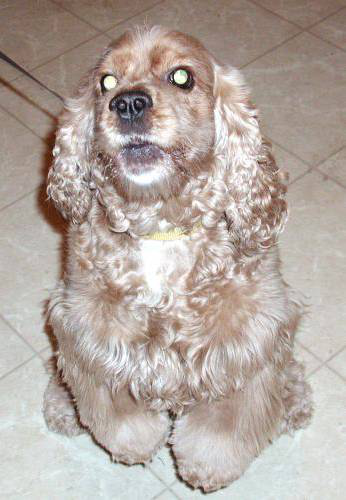

In [9]:
from tensorflow.keras.preprocessing.image import load_img
p = "dataset/train/dog.3014.jpg"
img = load_img(p)
print(img.size)
img

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
for l in cnn.layers:
    # trainable一定要設, compile前設定好
    l.trainable = False
    model.add(l)
# 我自己的MLP
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      